In [93]:
import pickle
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import seaborn as sns
import numpy as np
from box_world_env import BoxWorld

In [117]:
rel_episodes = pickle.load(open('./rel_eps.pkl', 'rb'))
base_episodes = pickle.load(open('./base_eps.pkl', 'rb'))
rel_3_episodes = pickle.load(open('./rel_len_3_eps_.pkl', 'rb'))
rel_4_episodes = pickle.load(open('./rel_len_4_eps_.pkl', 'rb'))
base_3_episodes = pickle.load(open('./base_len_3_eps.pkl', 'rb'))
base_4_episodes = pickle.load(open('./base_len_4_eps_.pkl', 'rb'))
sarsa = pickle.load(open('./tabsarsa_eps-1.pkl', 'rb'))
ql = pickle.load(open('./tabqlearning_eps.pkl', 'rb'))

In [95]:
df_rel = pd.DataFrame(rel_episodes)
df_base = pd.DataFrame(base_episodes)
df_rel_3 = pd.DataFrame(rel_3_episodes)
df_rel_4 = pd.DataFrame(rel_4_episodes)
df_base_3 = pd.DataFrame(base_3_episodes)
df_base_4 = pd.DataFrame(base_4_episodes)

In [108]:
df_sarsa = pd.DataFrame(sarsa)
df_ql = pd.DataFrame(ql)

In [111]:
df_base.solved.mean()

0.602

In [110]:
df_sarsa.solved.mean()

0.562

In [96]:
df_rel_3.solved.mean(), df_base_3.solved.mean()

(0.64, 0.6)

In [97]:
df_rel_4.solved.mean(), df_base_4.solved.mean()

(0.6, 0.57)

In [98]:
df_rel_3.solved

0     False
1      True
2      True
3      True
4      True
      ...  
95     True
96    False
97    False
98     True
99     True
Name: solved, Length: 100, dtype: bool

In [99]:
(df_rel.solved == True).mean()

0.652

In [100]:
(df_base.solved == True).mean()

0.602

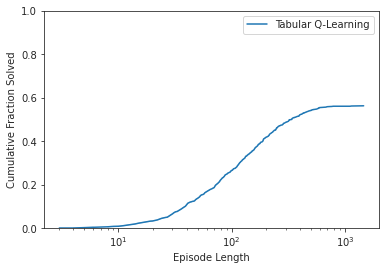

In [116]:
with sns.axes_style('ticks'):
    df = df_sarsa.sort_values(by='lengths')
    df['solved_cum'] = df.solved.cumsum()
    df['solved_cum_pct'] = df.solved_cum / len(df)
    fig, ax = plt.subplots()
    ax.set(xscale='log')
    ax.set_ylim(0, 1)
    sns.lineplot(data=df, x='lengths', y='solved_cum_pct', label='Tabular Q-Learning', ax=ax)
    # plt.savefig('bar.png')
    ax.set_xlabel('Episode Length')
    ax.set_ylabel('Cumulative Fraction Solved')
    plt.savefig('cumulative_success_tab.pdf')

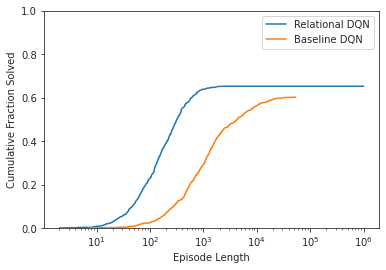

In [114]:
with sns.axes_style('ticks'):
    df = df_rel.sort_values(by='lengths')
    df['solved_cum'] = df.solved.cumsum()
    df['solved_cum_pct'] = df.solved_cum / len(df)
    fig, ax = plt.subplots()
    ax.set(xscale='log')
    ax.set_ylim(0, 1)
    sns.lineplot(data=df, x='lengths', y='solved_cum_pct', label='Relational DQN', ax=ax)
    # plt.savefig('bar.png')

    df = df_base.sort_values(by='lengths')
    df['solved_cum'] = df.solved.cumsum()
    df['solved_cum_pct'] = df.solved_cum / len(df)
    # fig, ax = plt.subplots()
    # ax.set(xscale='log')
    # ax.set_ylim(0, 1)
    sns.lineplot(data=df, x='lengths', y='solved_cum_pct', label='Baseline DQN', ax=ax)
    # plt.savefig('bar.png')
    ax.set_xlabel('Episode Length')
    ax.set_ylabel('Cumulative Fraction Solved')
    plt.savefig('cumulative_success.pdf')

In [49]:
data = {
    'goal_len': [],
    'episode_len': [],
    'success': [],
    'agent': []
}
for length, success in df_rel.values:
    data['goal_len'].append(2)
    data['episode_len'].append(length)
    data['success'].append(success)
    data['agent'].append('relational')
for length, success in df_base.values:
    data['goal_len'].append(2)
    data['episode_len'].append(length)
    data['success'].append(success)
    data['agent'].append('baseline')

for length, success in df_rel_3.values:
    data['goal_len'].append(3)
    data['episode_len'].append(length)
    data['success'].append(success)
    data['agent'].append('relational')
for length, success in df_base_3.values:
    data['goal_len'].append(3)
    data['episode_len'].append(length)
    data['success'].append(success)
    data['agent'].append('baseline')

for length, success in df_rel_4.values:
    data['goal_len'].append(4)
    data['episode_len'].append(length)
    data['success'].append(success)
    data['agent'].append('relational')
for length, success in df_base_4.values:
    data['goal_len'].append(4)
    data['episode_len'].append(length)
    data['success'].append(success)
    data['agent'].append('baseline')


df_data = pd.DataFrame(data)

In [80]:
df_data

,goal_len,episode_len,success,agent
0,2,623,True,relational
1,2,190,False,relational
2,2,76,False,relational
3,2,259,False,relational
4,2,300,True,relational
...,...,...,...,...
2395,4,1555,True,baseline
2396,4,799,True,baseline
2397,4,1729,False,baseline
2398,4,144,True,baseline


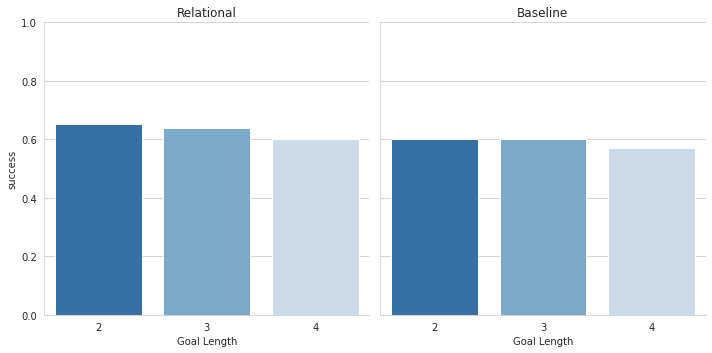

In [105]:
with sns.axes_style('whitegrid'):
    g = sns.catplot(data=df_data, x='goal_len', y='success', col='agent', kind='bar', ci=None, palette='Blues_r', sharey=True)

    for ax in g.axes[0]:
        ax.set_ylim(0, 1)

    g.axes[0][0].set_title('Relational')
    g.axes[0][0].set_xlabel('Goal Length')


    g.axes[0][1].set_title('Baseline')
    g.axes[0][1].set_xlabel('Goal Length')

plt.savefig('tran_test_perf.pdf')

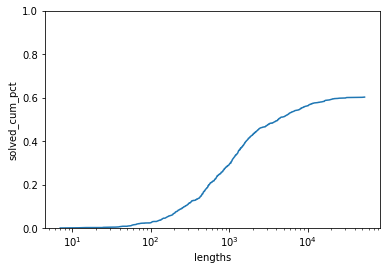

In [28]:
df = df_base.sort_values(by='lengths')
df['solved_cum'] = df.solved.cumsum()
df['solved_cum_pct'] = df.solved_cum / len(df)
fig, ax = plt.subplots()
ax.set(xscale='log')
ax.set_ylim(0, 1)
sns.lineplot(data=df, x='lengths', y='solved_cum_pct', ax=ax)
# plt.savefig('bar.png')

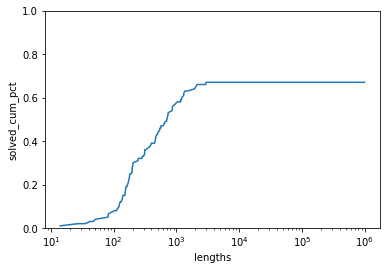

In [52]:
df = pd.DataFrame(base_3_episodes).sort_values(by='lengths')
df['solved_cum'] = df.solved.cumsum()
df['solved_cum_pct'] = df.solved_cum / len(df)
fig, ax = plt.subplots()
ax.set(xscale='log')
ax.set_ylim(0, 1)
sns.lineplot(data=df, x='lengths', y='solved_cum_pct', ax=ax)
# plt.savefig('bar.png')

In [30]:
import torch
agent_base = torch.load('agent_base.pth')
agent_rel = torch.load('agent_rel.pth')

In [31]:
agent_base.policy.eval()
agent_base.target.eval()
agent_rel.policy.eval()
agent_rel.target.eval()

RelationalPolicy(
  (conv): Sequential(
    (0): Conv2d(3, 6, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(6, 24, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): ConcatCoords()
  )
  (rb): Sequential(
    (0): RelationalBlock(
      (mhdpa): MHDPA(
        (Wq): Linear(in_features=26, out_features=26, bias=True)
        (Wv): Linear(in_features=26, out_features=26, bias=True)
        (Wk): Linear(in_features=26, out_features=26, bias=True)
      )
      (mlps): ModuleList(
        (0): MLP(
          (lin1): Linear(in_features=26, out_features=26, bias=True)
          (lin2): Linear(in_features=26, out_features=26, bias=True)
        )
        (1): MLP(
          (lin1): Linear(in_features=26, out_features=26, bias=True)
          (lin2): Linear(in_features=26, out_features=26, bias=True)
        )
        (2): MLP(
          (lin1): Linear(in_features=26, out_features=26, bias=True)
          (lin2): Linear(in_features=26, out_features=26, bias=True)


In [32]:
def generate_env_set(seeds, n, goal_lengths, num_distractors, distractor_length):
    for seed in seeds:
        env = BoxWorld(n, np.random.choice(goal_lengths), np.random.choice(num_distractors), distractor_length)
        env.seed(seed)
        yield env

In [33]:
len_3_env = generate_env_set(range(100), 6, [3], [0, 1, 2], 1)

len_4_env = generate_env_set(range(100, 200), 6, [4], [0, 1, 2], 1)

In [34]:
def boxworld_state_to_tensor(x):
    return transforms.functional.to_tensor(x).unsqueeze(0).double()
    

In [35]:
from torchvision import transforms
from itertools import count


In [41]:
len_3_env = generate_env_set([5], 6, [3], [0, 1, 2], 1)


In [42]:
env = next(len_3_env)

In [43]:
env.reset()

array([[[-1.7254902 , -1.7254902 , -1.7254902 ],
        [-1.7254902 , -1.7254902 , -1.7254902 ],
        [-1.7254902 , -1.7254902 , -1.7254902 ],
        [-1.7254902 , -1.7254902 , -1.7254902 ],
        [-1.7254902 , -1.7254902 , -1.7254902 ],
        [-1.7254902 , -1.7254902 , -1.7254902 ],
        [-1.7254902 , -1.7254902 , -1.7254902 ],
        [-1.7254902 , -1.7254902 , -1.7254902 ]],

       [[-1.7254902 , -1.7254902 , -1.7254902 ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [-1.7254902 , -1.7254902 , -1.7254902 ]],

       [[-1.7254902 , -1.7254902 , -1.7254902 ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.    

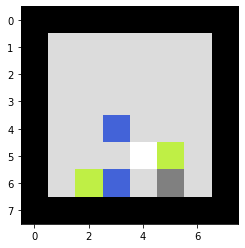

In [44]:
env.render()